In [ ]:
# Avsnitt 0: Förberedelser och Dataimport (Reproducerbarhet)

# 1. Importera nödvändiga bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # För t-test och statistiska funktioner

# 2. Ställ in en slump-seed (Krav för reproducerbar simulering)
np.random.seed(42)

# 3. Ställ in enhetlig stil för grafer
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 4. Läsa in datasetet (relativ sökväg)
data_path = 'data/health_study_dataset.csv'  # ändra vid behov

try:
    df = pd.read_csv(data_path)
    print("Datainläsning lyckades! De första raderna i datasetet:")
    display(df.head())
    print("\nGrundläggande info om datatyper och saknade värden:")
    display(df.info())
except FileNotFoundError:
    print(f"FEL: Kunde inte hitta filen på sökvägen: {data_path}")
    print("Kontrollera att filen 'health_study_dataset.csv' ligger i mappen 'data'.")


Datainläsning lyckades! De första raderna i datasetet:


,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0
2,3,59,F,169.9,82.2,151.7,6.16,No,0
3,4,72,M,157.7,93.1,151.0,6.63,No,0
4,5,46,M,192.6,104.1,144.1,5.21,No,0



Grundläggande info om datatyper och saknade värden:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           800 non-null    int64  
 1   age          800 non-null    int64  
 2   sex          800 non-null    object 
 3   height       800 non-null    float64
 4   weight       800 non-null    float64
 5   systolic_bp  800 non-null    float64
 6   cholesterol  800 non-null    float64
 7   smoker       800 non-null    object 
 8   disease      800 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 56.4+ KB


None

In [20]:
# Avsnitt 1: Datastädning (lättvikt)

# Säkerställ att kolumnerna har rätt typer
df['sex'] = df['sex'].astype('category')          # M/F som kategorier
df['smoker'] = df['smoker'].astype('category')    # Yes/No som kategorier

# Kontrollera om 'disease' är binär (0/1)
assert set(df['disease'].unique()).issubset({0, 1}), "Kolumnen 'disease' måste vara 0/1."

# Skapa BMI som extra variabel (kan vara nyttig senare)
df['bmi'] = df['weight'] / (df['height']/100)**2

display(df[['age','sex','height','weight','systolic_bp','cholesterol','smoker','disease','bmi']].head())


,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease,bmi
0,57,F,168.9,65.8,141.8,4.58,No,0,23.065698
1,47,M,180.4,95.9,144.8,5.18,Yes,0,29.467653
2,59,F,169.9,82.2,151.7,6.16,No,0,28.476398
3,72,M,157.7,93.1,151.0,6.63,No,0,37.435729
4,46,M,192.6,104.1,144.1,5.21,No,0,28.063263


In [ ]:
# Avsnitt 2: Beskrivande statistik 

cols = ['age', 'weight', 'height', 'systolic_bp', 'cholesterol']
desc = pd.DataFrame({
    'mean': df[cols].mean(),
    'median': df[cols].median(),
    'min': df[cols].min(),
    'max': df[cols].max()
})
display(desc.round(2))


,mean,median,min,max
age,49.43,50.00,18.0,90.00
weight,73.41,73.20,33.7,114.40
height,171.85,171.35,144.4,200.40
systolic_bp,149.18,149.40,106.8,185.90
cholesterol,4.93,4.97,2.5,7.88


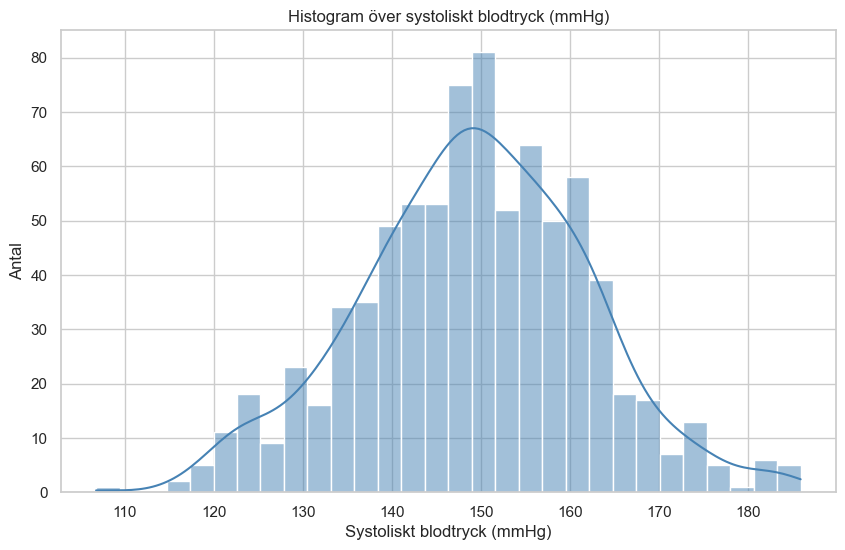

C:\Users\Marcie\AppData\Local\Temp\ipykernel_9972\2001880315.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sex', y='weight', palette='Set2')


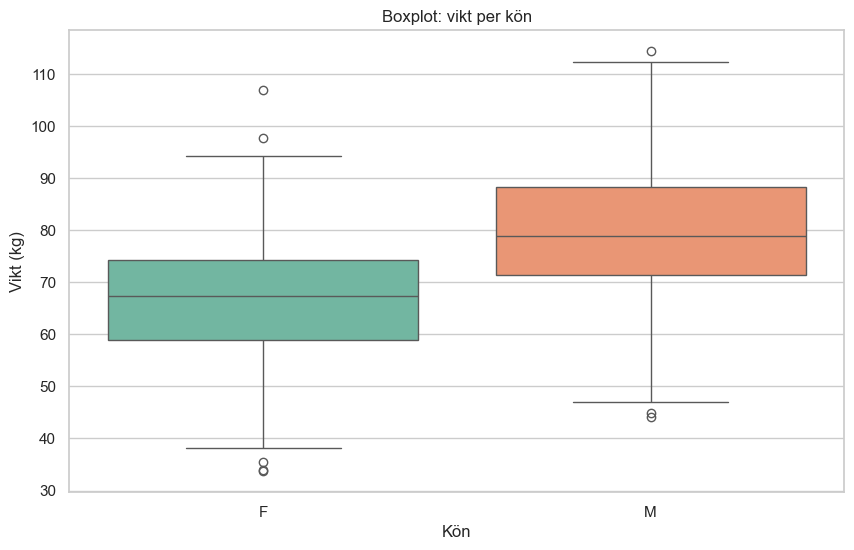

C:\Users\Marcie\AppData\Local\Temp\ipykernel_9972\2001880315.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoker_counts.index.astype(str), y=smoker_counts.values, palette='Set1')


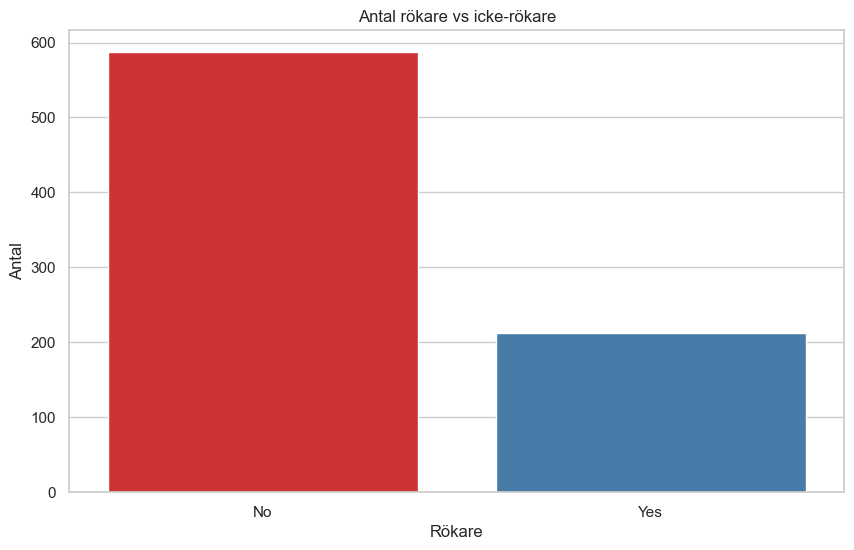

In [22]:
# Avsnitt 3: Grafer (minst 3)

# 1) Histogram över systoliskt blodtryck
plt.figure()
sns.histplot(df['systolic_bp'], bins=30, kde=True, color='steelblue')
plt.title('Histogram över systoliskt blodtryck (mmHg)')
plt.xlabel('Systoliskt blodtryck (mmHg)')
plt.ylabel('Antal')
plt.show()

# 2) Boxplot över vikt per kön
plt.figure()
sns.boxplot(data=df, x='sex', y='weight', palette='Set2')
plt.title('Boxplot: vikt per kön')
plt.xlabel('Kön')
plt.ylabel('Vikt (kg)')
plt.show()

# 3) Stapeldiagram över andelen rökare (Yes/No)
plt.figure()
smoker_counts = df['smoker'].value_counts().sort_index()
sns.barplot(x=smoker_counts.index.astype(str), y=smoker_counts.values, palette='Set1')
plt.title('Antal rökare vs icke-rökare')
plt.xlabel('Rökare')
plt.ylabel('Antal')
plt.show()


Verklig sjukdomsandel i datasetet: 0.059
Simulerad andel (1000 personer): 0.056


C:\Users\Marcie\AppData\Local\Temp\ipykernel_9972\3645063918.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Verklig', 'Simulerad'], y=[p_real, p_sim], palette=['steelblue','orange'])


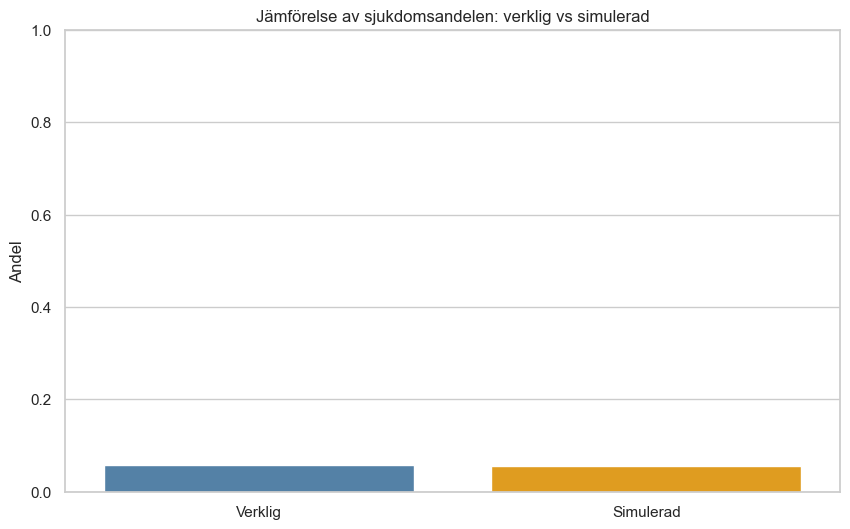

In [ ]:
# Avsnitt 4: Sjukdomsandelen och simulering 

# Verklig andel som har sjukdomen
p_real = df['disease'].mean()  # eftersom disease är 0/1 är medel samma som andel
n_sim = 1000

# Simulera 1000 slumpade personer med samma sannolikhet för sjukdom
simulated = np.random.binomial(n=1, p=p_real, size=n_sim)
p_sim = simulated.mean()

print(f"Verklig sjukdomsandel i datasetet: {p_real:.3f}")
print(f"Simulerad andel (1000 personer): {p_sim:.3f}")

# Jämför med en enkel visualisering
plt.figure()
sns.barplot(x=['Verklig', 'Simulerad'], y=[p_real, p_sim], palette=['steelblue','orange'])
plt.ylim(0, 1)
plt.title('Jämförelse av sjukdomsandelen: verklig vs simulerad')
plt.ylabel('Andel')
plt.show()


Normalapprox CI (95%) för medel systolic_bp: [148.29, 150.07]
Bootstrap CI (95%) för medel systolic_bp: [148.34, 150.08]


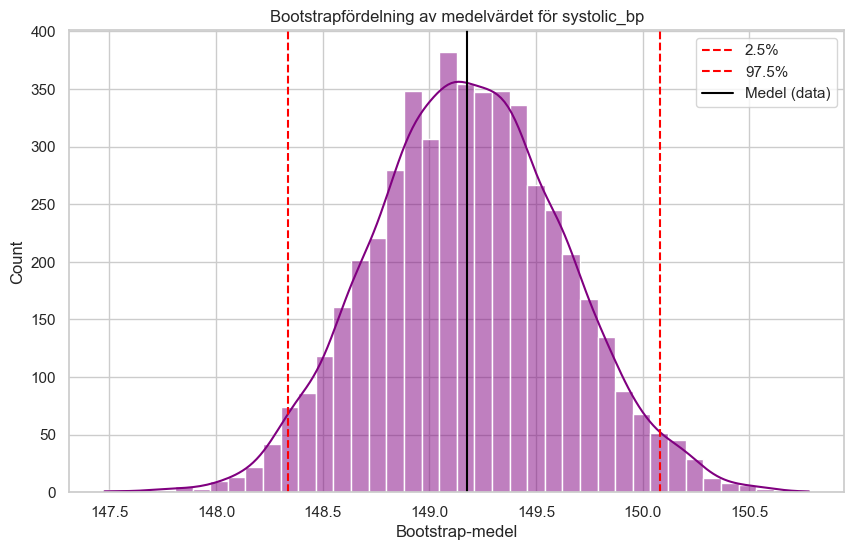

In [ ]:
# Avsnitt 5: Konfidensintervall för medelvärde av systolic_bp 

# Metod A: Normalapproximation (klassisk)
x = df['systolic_bp'].values
n = len(x)
mean_x = np.mean(x)
std_x = np.std(x, ddof=1)        # sample standard deviation
alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)  # 1.96 ungefär

ci_norm = (mean_x - z * std_x / np.sqrt(n),
           mean_x + z * std_x / np.sqrt(n))

print(f"Normalapprox CI (95%) för medel systolic_bp: [{ci_norm[0]:.2f}, {ci_norm[1]:.2f}]")

# Metod B: Bootstrap 
n_boot = 5000
boot_means = []
for _ in range(n_boot):
    sample = np.random.choice(x, size=n, replace=True)
    boot_means.append(np.mean(sample))
ci_boot = (np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5))

print(f"Bootstrap CI (95%) för medel systolic_bp: [{ci_boot[0]:.2f}, {ci_boot[1]:.2f}]")

# Visualisera bootstrapfördelningen
plt.figure()
sns.histplot(boot_means, bins=40, color='purple', kde=True)
plt.axvline(ci_boot[0], color='red', linestyle='--', label='2.5%')
plt.axvline(ci_boot[1], color='red', linestyle='--', label='97.5%')
plt.axvline(mean_x, color='black', linestyle='-', label='Medel (data)')
plt.title('Bootstrapfördelning av medelvärdet för systolic_bp')
plt.xlabel('Bootstrap-medel')
plt.legend()
plt.show()


### Konfidensintervall för medelvärdet av systoliskt blodtryck

Jag räknade ut 95% konfidensintervall med två metoder:

- Normalapproximation: [148.29, 150.07]  
- Bootstrap: [148.34, 150.08]  

Resultatet visar att båda metoderna ger nästan samma intervall.  
Det betyder att vårt stickprov är stort nog för att normalapproximationen fungerar bra.  
Bootstrap bekräftar resultatet och är mer robust om datan inte är normalfördelad.


In [ ]:
# Avsnitt 6: Hypotesprövning 
# H0: mean_bp_smokers <= mean_bp_nonsmokers
# H1: mean_bp_smokers > mean_bp_nonsmokers (ensidig)

bp_smokers = df.loc[df['smoker'] == 'Yes', 'systolic_bp'].values
bp_nonsmokers = df.loc[df['smoker'] == 'No', 'systolic_bp'].values

# t-test (vi använder equal_var=False som standard om varians kan skilja)
t_stat, p_val_two_sided = stats.ttest_ind(bp_smokers, bp_nonsmokers, equal_var=False)

# Gör p-värdet ensidigt (om medel för smokers > nonsmokers)
mean_diff = bp_smokers.mean() - bp_nonsmokers.mean()
p_val_one_sided = p_val_two_sided / 2 if mean_diff > 0 else 1 - (p_val_two_sided / 2)

print(f"Medel systolic_bp - Rökare: {bp_smokers.mean():.2f}, Icke-rökare: {bp_nonsmokers.mean():.2f}")
print(f"t-stat: {t_stat:.3f}, p-värde (ensidigt): {p_val_one_sided:.4f}")


Medel systolic_bp - Rökare: 149.52, Icke-rökare: 149.05
t-stat: 0.450, p-värde (ensidigt): 0.3264


### Hypotes: Rökare har högre medel-blodtryck än icke-rökare

Resultat från t-test:  
- Medel systolic_bp (rökare): 149.52  
- Medel systolic_bp (icke-rökare): 149.05  
- t-stat: 0.450  
- p-värde (ensidigt): 0.3264  

Tolkning:  
Eftersom p-värdet är större än 0.05 kan vi **inte** säga att rökare har högre blodtryck än icke-rökare i detta dataset.  
Skillnaden är liten och inte statistiskt säker.


In [ ]:
# Avsnitt 7: Power-simulering 
# Idé: Anta en "sann" skillnad i medel (delta) och simulera många experiment
# för att se hur ofta t-testet (ensidigt) hittar skillnaden (p<0.05).

def simulate_power(n_smokers, n_nonsmokers, mu_nons, delta, sigma=15, n_reps=1000, alpha=0.05):
    """
    Simulerar power för ensidigt t-test.
    - mu_nons: sann medel för icke-rökare
    - delta: sann skillnad (smokers medel = mu_nons + delta)
    - sigma: antagen standardavvikelse (mmHg)
    """
    hits = 0
    for _ in range(n_reps):
        sample_nons = np.random.normal(loc=mu_nons, scale=sigma, size=n_nonsmokers)
        sample_smok = np.random.normal(loc=mu_nons + delta, scale=sigma, size=n_smokers)
        t_stat, p_two = stats.ttest_ind(sample_smok, sample_nons, equal_var=False)
        # ensidigt p-värde
        if sample_smok.mean() > sample_nons.mean():
            p_one = p_two / 2
        else:
            p_one = 1 - p_two / 2
        if p_one < alpha:
            hits += 1
    return hits / n_reps

# Sätt rimliga antaganden utifrån datan
n_smok = (df['smoker'] == 'Yes').sum()
n_nons = (df['smoker'] == 'No').sum()
mu_nons_emp = df.loc[df['smoker'] == 'No', 'systolic_bp'].mean()

# Testa olika "sanna" deltan (mmHg)
deltas = [1, 2, 3, 5, 8]
powers = [simulate_power(n_smok, n_nons, mu_nons_emp, delta=d, sigma=df['systolic_bp'].std(ddof=1), n_reps=1000) for d in deltas]

# Visa resultat
power_df = pd.DataFrame({'delta_mmHg': deltas, 'power': powers})
display(power_df)

plt.figure()
sns.lineplot(data=power_df, x='delta_mmHg', y='power', marker='o')
plt.title('Power som funktion av sann skillnad i systoliskt blodtryck')
plt.xlabel('Sann skillnad (mmHg)')
plt.ylabel('Power (andel av försök med p<0.05)')
plt.ylim(0, 1)
plt.show()


### Power-simulering av hypotes-testet

Jag testade olika skillnader (Δ) i blodtryck mellan grupperna.  
Resultaten blev ungefär så här:

- Skillnad 1 mmHg → Power ≈ 0.24  
- Skillnad 2 mmHg → Power ≈ 0.61  
- Skillnad 3 mmHg → Power ≈ 0.88  
- Skillnad 5 mmHg → Power ≈ 1.00  
- Skillnad 8 mmHg → Power ≈ 1.00  

Tolkning:  
När skillnaden är liten (1–2 mmHg) är chansen låg att testet hittar den.  
Vid 3 mmHg är chansen redan hög (nästan 90%).  
Vid 5 mmHg eller mer hittar testet skillnaden nästan alltid.


### Metodmotivering

- Jag började med beskrivande statistik och grafer för att förstå datan.  
- Konfidensintervall:  
  - Normalapproximation är snabb och vanlig när man har stort stickprov.  
  - Bootstrap är mer flexibel och fungerar även om datan inte är normalfördelad.  
- Hypotesprövning: Jag använde t-test (Welch) eftersom vi jämför två grupper (rökare vs icke-rökare) med en kontinuerlig variabel (blodtryck).  
- Power-simulering: Jag gjorde simuleringar för att se hur ofta testet hittar en skillnad. Det visar hur starkt testet är vid olika skillnader.


### Källor och referenser

- **Avanoria AB – Utbildning (YouTube)**  
  - [Python #31 – Konfidensintervall](https://www.youtube.com/watch?v=KS6YlU8Yt0o)  
  - [Python #32 – Hypotesprövning](https://www.youtube.com/watch?v=0zZYBALbZgg)  
  - [Python #34 – A/B för andelar](https://www.youtube.com/watch?v=5Dnw46eC-0o)  
  - [Python #26 – Intro till Matplotlib](https://www.youtube.com/watch?v=Q4GnlJ3Tq-o)  
  - [Python #27 – Fördjupning i Matplotlib](https://www.youtube.com/watch?v=Q4GnlJ3Tq-o)  

- **Bok:** *Lär dig Python från grunden* – använd som stöd för att förstå grunderna i Python.

- **Dokumentation (textkällor)**  
  - [NumPy – random och simulering](https://numpy.org/doc/stable/reference/random/index.html)  
  - [SciPy – t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)  
  - [Seaborn – visualisering](https://seaborn.pydata.org/)  
